# Basic image processes Ⅱ

&copy; 李浩东 haodongli@zju.edu.cn
&copy; 孙正男 3190102989@zju.edu.cn

- Histogram
- Histogram equalization
- Convolution operation
- #Pooling operation


# 1 Histogram Equalization
## 1.1 Histogram
![histogram](./images/histogram.png)


* 如果将图像中像素亮度（灰度级别）看成是一个随机变量，则其分布情况就反映了图像的统计特性，这可用来刻画和描述，表现为灰度直方图。
* 灰度直方图是灰度级的函数，它表示图像中具有某种灰度级的像素的个数，反映了图像中每种灰度出现的频率
* 灰度直方图的**横坐标是灰度级，纵坐标是该灰度级出现的频度**，它是图像最基本的统计特征
* 直方图**只反映不同灰度值的次数**，不反应不同灰度值的位置
* **图像与直方图的关系是多对一的关系**

![d_b_h](./images/dark_bright_histogram.png)
<img src="./images/opencv-basic/灰度直方图.png" style="zoom:20%;">

- 设r代表图像中像素灰度级，作**归一化**处理后，r将被限定在[0,1]之内。在灰度级中，r=0代表黑，r=1代表白。对于一幅给定的图像来说，每一个像素取得[0,1]区间内的灰度级是随机的，也就是说r是一个随机变量。假定对每一瞬间，它们是连续的随机变量，那么就可以用概率密度函数$p_r(r)$来表示原始图像的灰度分布。如果用直角坐标系的**横轴代表灰度级r**，用纵轴代表灰度级的**概率密度函数$p_r(r)$**，这样就可以针对一幅图像在这个坐标系中作出一条曲线来。这条曲线在概率论中就是概率密度曲线。
<table>
  <tr>
    <td> <center> 较暗 </center> </td>
      <td> <center> 较亮 </center> </td>
  </tr>
  <tr>
    <td>  <img src=".\images\opencv-basic\Dark_Hist.png"> </td>
      <td>  <img src=".\images\opencv-basic\Bright_Hist.png"> </td>
  </tr>
    
</table>

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.colors as mat_color

(375, 600, 3)


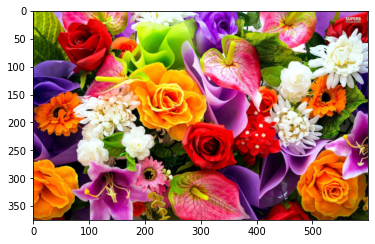

In [2]:
img_bgr = cv2.imread("./images/flowers_small.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
print(img_rgb.shape)
no_norm = mat_color.Normalize(vmin=0, vmax=255, clip=False)
plt.imshow(img_rgb, norm=no_norm)
img_gray = cv2.imread("./images/flowers_small.jpg", flags=0)

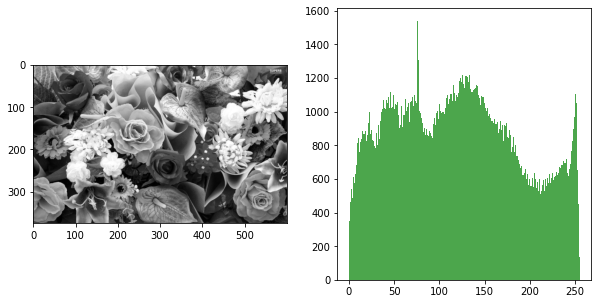

In [3]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_gray, 'gray', norm=no_norm)
plt.subplot(1, 2, 2)
n, bins, patches = plt.hist(img_gray.ravel(), bins=256, color='green', alpha=0.7)

## 1.2 Histogram equalization

![histogram_equalization](./images/histogram_equalization.png)


* 直方图均衡化通常用来**增加许多图像的全局对比度**，尤其是**当图像的有用数据的对比度相当接近的时候**。通过这种方法，亮度可以更好地在直方图上分布
* 直方图均衡会造成图像信息**损失**

### 直方图拉伸
* 直方图均衡化处理是以累积分布函数变换法为基础的直方图修正法
* 假定变换函数为:$s = T(r) = \int_0^r p_r(\omega)d\omega$  ($\omega$ 是积分变量，$\int_0^r p_r(\omega)d\omega是r的累积分布函数$)。对式中的r求导，则$ \frac {ds} {dr} = p_r(r)$

* 其中，变换函数$T(r)$应满足两个条件：
    * 累积分布函数是r的函数，并且单调地从0增加到1，满足关于T(r)在0≤r≤1内单值**单调增加**。
    * 在0≤r≤1内有0≤T(r)≤1。
* 由概率论理论可知，如果已知随机变量$\xi$的概率密度函数为$p_r(r)$，而随机变量$\eta$是$\xi$的函数，即$\eta=T(\xi)$，$\eta$的概率密度为$p_s(s)$，可由$p_r(r)$求出$p_s(s)$
* $s=T(r)$是单调增加的，则$r=T^{-1}(s)$也是单调函数，则$\eta < s$仅当$\xi < r$时发生，可求得随机变量$\eta$的分布函数为：
$$
F_{\eta}(s) = p(\eta < \xi) = p[\xi < r] = \int_{-\infty}^r p_r(x)dx
$$
* 两边求导，可得到随机变量$\eta$的分布密度函数为:
$$
p_s(s) = [p_r(r) \cdot \frac {dr} {ds}]_{r=T^{-1}(s)}=[p_r(r)\cdot \frac 1{ds / dr}]_{r=T^{-1}(s)}=[p_r(r)\cdot \frac 1 {p_r(r)}] = 1
$$
* 由此可以说明采用上述的变换函数可以实现直方图的均衡。

* 连续情况：
    <img src="./images/opencv-basic/HistEqua_C.jpg" style="zoom:70%;">

* 离散情况：
1. 用频数代替概率值，即$p_r(r_k) = \frac {n_k} n (0 \leq r_k \leq 1, k = 0, 1, ...,l-1)$，式中l为灰度级总数目，$n_k$为图像中出现第k级灰度的次数，n为图像中像素总数
2. 转换函数的离散表示情况为：
$$
s_k = T(r_k) = \sum_{j=0}^k \frac {n_j} n = \sum_{j=0}^k p_r(r_j)(0 \leq r_j \leq 1, k = 0, 1, ...,l-1)
$$
3. 离散情况下，$s_k$的取值只能在给定的$r_k$的取值范围内，需要将$s_k$值进行最后的变换以与$r_k$取值范围相符合

* 例题：
<img src="./images/opencv-basic/HistEqua例题.jpg" style="zoom:40%;">

* 利用累积分布函数作为灰度变换函数，经变换后得到的新直方图虽然不是很平坦，但毕竟比原始图像的直方图平坦的多， 而且其动态范围也大大地扩展了。因此，这种方法对于对比度较弱的图像进行处理是很有效的。
* 从上例可以看出，变换后的**灰度级减少**了，这种现象叫做 **“简并”现象**。由于简并现象的存在，处理后的灰度级总是要减少的， 这是像素灰度有限的必然结果

![hist_equa](./images/hist_equa.png)

In [4]:
def compress_single(mean_value, img):
    # compress & flatten
    # allocate memory space and define compress rate
    hist = np.zeros(img.shape)
    for i in range(height):
        for j in range(width):
            rate = 0.875 + np.random.uniform(0, 0.05)
            hist[i][j] = mean_value * rate + img[i][j] * (1 - rate)
    return hist

height, width = img_gray.shape
mean_value = np.mean(img_gray)
print("mean value ->", mean_value)
img_hist = compress_single(mean_value, img_gray)
print("img_hist", np.min(img_hist), np.max(img_hist))
print("img_gray", np.min(img_gray), np.max(img_gray))
cv2.imwrite("./images/flowers_hist.jpg", img_hist)
print("compress done")

mean value -> 120.39762222222222
img_hist 105.36680296340616 137.19933854516765
img_gray 0 255
compress done


In [5]:
def show_hist_cdf(img):
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    plt.figure(figsize=(10, 7))
    plt.subplot(2, 2, 1)
    plt.imshow(img, 'gray', norm=no_norm)
    plt.subplot(2, 2, 2)
    plt.plot(cdf_normalized, color = 'b', linewidth=1.5)
    plt.hist(img.flatten(), 256, [0, 256], color='r', alpha=0.7)
    plt.legend(('cdf','histogram'), loc = 'upper left')
    plt.show()

this is a good distributed image


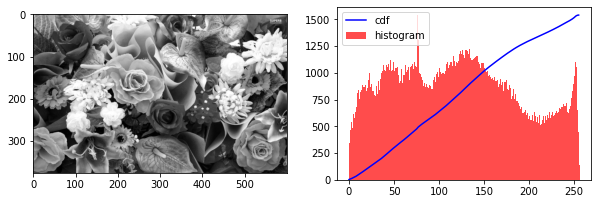

In [6]:
print("this is a good distributed image")
show_hist_cdf(img_gray)

this is a compressed image, not good


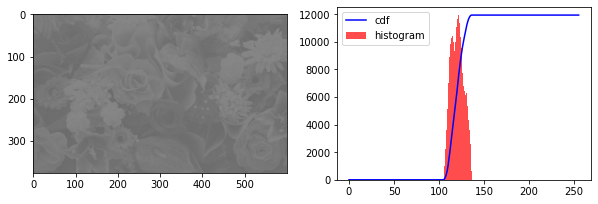

In [7]:
print("this is a compressed image, not good")
show_hist_cdf(img_hist)

trsnafer the bad image to a good one


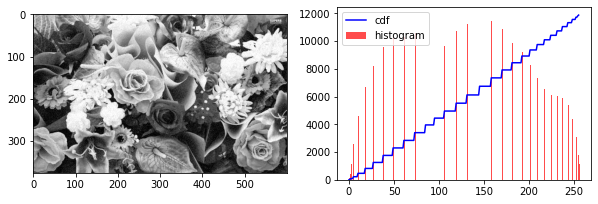

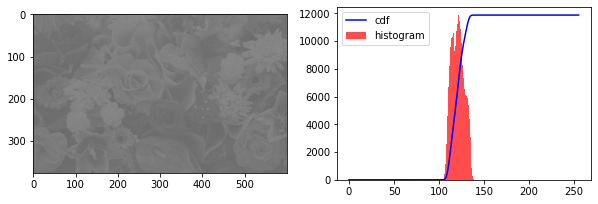

In [8]:
print("trsnafer the bad image to a good one")
img_hist = cv2.imread("./images/flowers_hist.jpg", flags=0)

img_equa = cv2.equalizeHist(img_hist)

cv2.imwrite("./images/flowers_equa.jpg", img_equa)
show_hist_cdf(img_equa) # after equalization
show_hist_cdf(img_hist)

* “简并”现象

now let's apply it in RGB images
compress RGB done


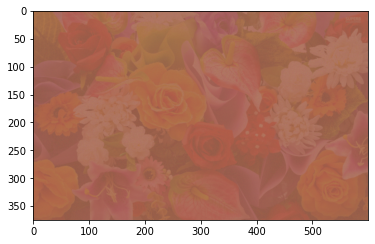

In [9]:
print("now let's apply it in RGB images")
img_bgr = cv2.imread("./images/flowers_small.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
R, G, B = cv2.split(img_rgb)

R_hist = compress_single(np.mean(R), R)
G_hist = compress_single(np.mean(G), G)
B_hist = compress_single(np.mean(B), B)

img_hist = cv2.merge((R_hist, G_hist, B_hist))
plt.imshow(img_hist.astype('uint8'), norm=no_norm)
# cv2.imwrite("./images/flowers_hist_rgb.jpg", img_hist.astype('uint8'))
plt.imsave("./images/flowers_hist_rgb.jpg", img_hist.astype('uint8'), 
           vmin=0, vmax=255)
print("compress RGB done")

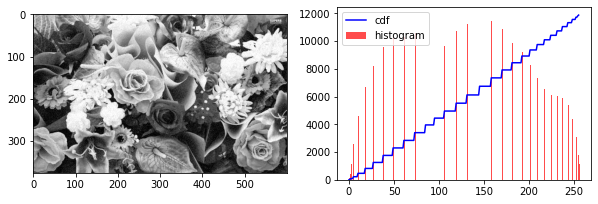

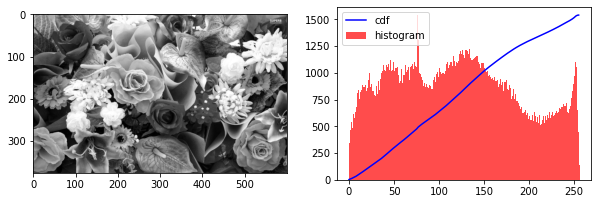

In [10]:
show_hist_cdf(img_equa) # after equalization
show_hist_cdf(img_gray)

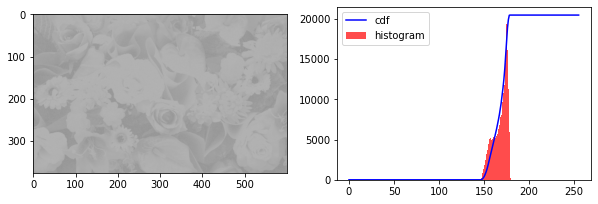

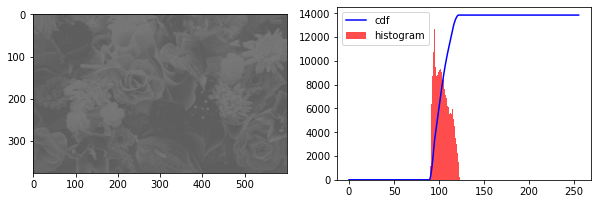

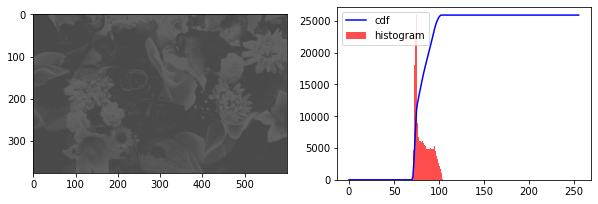

In [11]:
show_hist_cdf(R_hist)
show_hist_cdf(G_hist)
show_hist_cdf(B_hist)

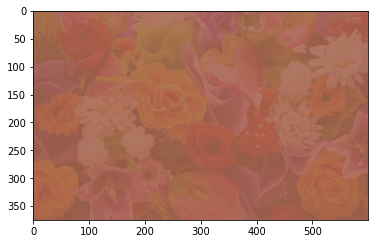

In [12]:
img_bgr = cv2.imread("./images/flowers_hist_rgb.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb.astype('uint8'), norm=no_norm)

compress RGB done


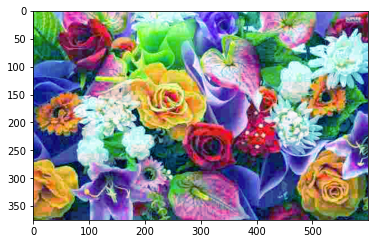

In [13]:
R, G, B = cv2.split(img_rgb)

R_equa = cv2.equalizeHist(R)
G_equa = cv2.equalizeHist(G)
B_equa = cv2.equalizeHist(B)

img_equa = cv2.merge((R_equa, G_equa, B_equa))
# cv2.imwrite("./images/flowers_equa_rgb.jpg", img_equa)
plt.imsave("./images/flowers_equa_rgb.jpg", img_equa, vmin=0, vmax=255)
plt.imshow(img_equa, norm=no_norm) # after equalization
print("compress RGB done")

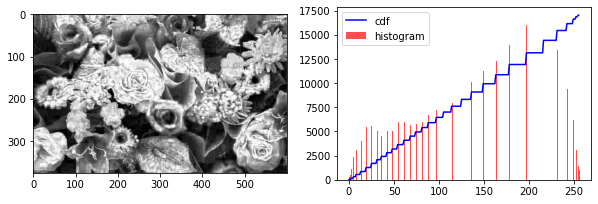

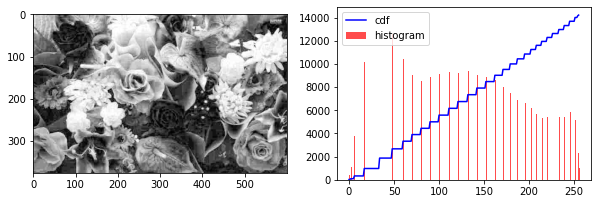

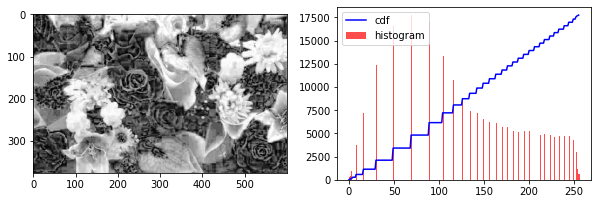

In [14]:
show_hist_cdf(R_equa) # after equalization
show_hist_cdf(G_equa)
show_hist_cdf(B_equa)

# 2 Convolution operation

![convolution](./images/convolution.png)


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(489, 730, 3)


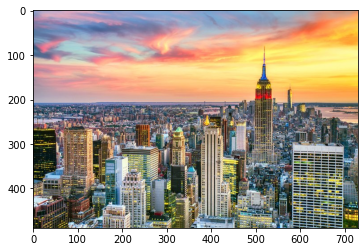

In [2]:
# Read Img
img_bgr = cv2.imread("./images/city.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
print(img_rgb.shape)
plt.imshow(img_rgb)

In [3]:
# 对图片一个通道执行
def convolution_single_channel(img, core, core_size):
    height, width = img.shape[0] - core_size, img.shape[1] - core_size
    out = np.zeros(shape=(height, width), dtype=np.int16)
    for i in range(height):
        for j in range(width):
            value = np.sum(core * img[i:i+core_size, j:j+core_size])
            value = value/float(core_size**2.0)
            value = min(value, 255)
            value = max(value, 0)
            out[i][j] = int(value)
    return out

In [4]:
# 随机生成卷积模板的各位数
def generate_core(core_size):
    core = np.zeros(shape=(core_size, core_size), dtype=float)
    for i in range(core_size):
        for j in range(core_size):
            core[i][j] = np.random.uniform(-0.5, 2.5)
    return core

# 对图片执行卷积（彩色图片三个通道分别卷积）
def convolution_operation(img, is_random=True, cores=None, core_size=3):
    if is_random:
        cores = [generate_core(core_size) for _ in range(3)]
    if len(img.shape) == 3:
        R, G, B = cv2.split(img)
        R_conv = convolution_single_channel(R, cores[0], core_size)
        G_conv = convolution_single_channel(G, cores[1], core_size)
        B_conv = convolution_single_channel(B, cores[2], core_size)
        return cv2.merge((R_conv, G_conv, B_conv))
    else:
        return convolution_single_channel(img, cores, core_size)

(489, 730, 3)
(486, 727, 3)


(<matplotlib.image.AxesImage at 0x24a560996a0>,
 Text(0.5, 1.0, 'Convolutional'))

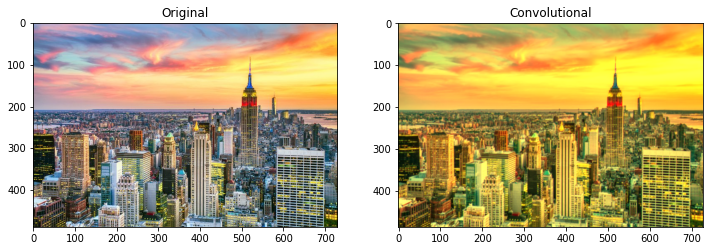

In [5]:
img_con = convolution_operation(img_rgb, is_random=True, core_size=3)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1), print(img_rgb.shape)
plt.imshow(img_rgb), plt.title("Original")
plt.subplot(1, 2, 2), print(img_con.shape)
plt.imshow(img_con), plt.title("Convolutional")

(489, 730, 3)
(486, 727, 3)


(<matplotlib.image.AxesImage at 0x24a56279f40>,
 Text(0.5, 1.0, 'Convolutional'))

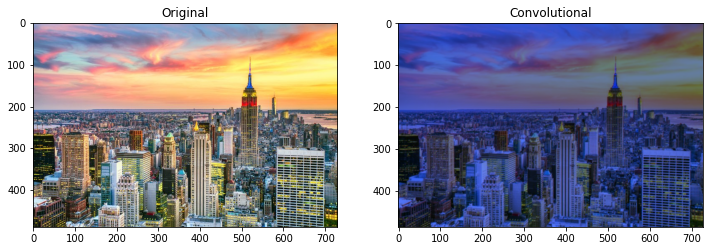

In [6]:
my_cores = [generate_core(3), np.ones((3, 3)) * 0.5, np.ones((3, 3))]
img_con = convolution_operation(img_rgb, is_random=False, cores=my_cores, core_size=3)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1), print(img_rgb.shape)
plt.imshow(img_rgb), plt.title("Original")
plt.subplot(1, 2, 2), print(img_con.shape)
plt.imshow(img_con), plt.title("Convolutional")

# #3 Pooling operation

![pool](./images/pool.svg)


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

(860, 820)
(1000, 1000)


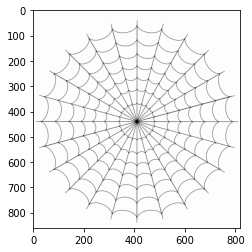

In [2]:
img_light = cv2.imread("./images/spiderweb.png", flags=0)
img_dark = cv2.imread("./images/spiderweb_dark.jpg", flags=0)
print(img_light.shape)
print(img_dark.shape)
plt.imshow(img_light, "gray")

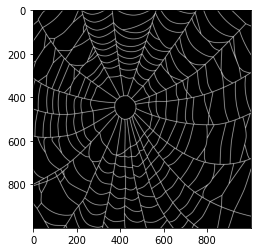

In [3]:
plt.imshow(img_dark, "gray")

In [4]:
def pool_operation(img, core_size, pool_type=1):
    out = np.zeros((int(img.shape[0]/core_size), int(img.shape[1]/core_size)), dtype=np.int32)
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            if pool_type == 1: # MIN Pool
                out[i][j] = np.min(img[i*core_size:i*core_size+core_size, 
                                       j*core_size:j*core_size+core_size])
            elif pool_type == 2: # MAX Pool
                out[i][j] = np.max(img[i*core_size:i*core_size+core_size, 
                                       j*core_size:j*core_size+core_size])
            elif pool_type == 3: # Average Pool
                out[i][j] = np.mean(img[i*core_size:i*core_size+core_size, 
                                        j*core_size:j*core_size+core_size])
            else:
                 print("Error: Invalid pool_type!")
    print(out.shape)
    return out

(215, 205)
(107, 102)


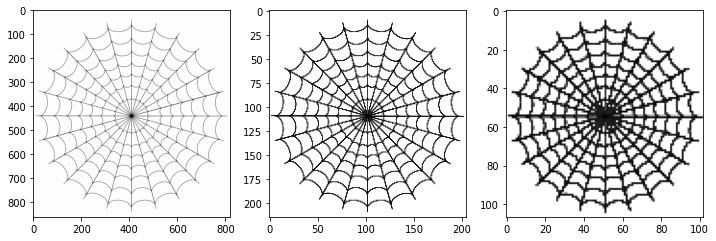

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_light, "gray")
plt.subplot(1, 3, 2)
plt.imshow(pool_operation(img_light, core_size=4), "gray")
plt.subplot(1, 3, 3)
plt.imshow(pool_operation(img_light, core_size=8), "gray")

(250, 250)
(125, 125)


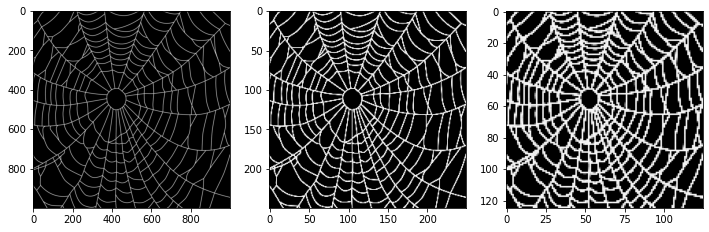

In [6]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_dark, "gray")
plt.subplot(1, 3, 2)
plt.imshow(pool_operation(img_dark, core_size=4, pool_type=2), "gray")
plt.subplot(1, 3, 3)
plt.imshow(pool_operation(img_dark, core_size=8, pool_type=2), "gray")

(250, 250)
(215, 205)


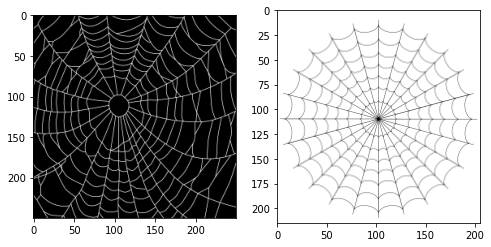

In [7]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(pool_operation(img_dark, core_size=4, pool_type=3), "gray")
plt.subplot(1, 2, 2)
plt.imshow(pool_operation(img_light, core_size=4, pool_type=3), "gray")

## The End

2023.3